In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM


Using TensorFlow backend.
c:\users\drale\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\drale\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\drale\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
def generateGraph(train, test, title, xlabel, ylabel, legend, fileTitle):
    ax, fig = plt.subplots(figsize=(10, 8))
    fig.plot(train)
    fig.plot(test)
    fig.set_xlabel(xlabel)
    fig.set_ylabel(ylabel)
    fig.set_title('{} - {}'.format(title, fileTitle))
    fig.legend(legend)
    ax.savefig('./graphs/{}.png'.format(fileTitle))
    

In [3]:
def readData(path, split):
    df = pd.read_csv(path)
#     print(df.head())
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df['Close']
    train = df.iloc[:-split]
    test = df.iloc[-split:]
    dates = df.index[-split+1:]
    return train, test, dates

In [4]:
def scaleData(train, test):
    sc= MinMaxScaler()
    train_sc = sc.fit_transform(train.values.reshape(-1, 1))
    test_sc = sc.transform(test.values.reshape(-1, 1))
    x_train = train_sc[:-1]
    y_train = train_sc[1:]

    x_test = test_sc[:-1]
    y_test = test_sc[1:]
    
    return x_train, y_train, x_test, y_test, sc

In [5]:
def createModel(x_train, y_train):
    x_train_t = x_train[:, None]
    
    K.clear_session()
    
    early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
    model = Sequential()
    model.add(LSTM(6, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train_t, y_train, epochs=100, batch_size=16, verbose=1, callbacks=[early_stop])
    return model

In [6]:
def saveSheet(y_pred, y_test, dates, sc, fileName):
    df = pd.DataFrame()
    y_pred = sc.inverse_transform(y_pred)
    y_test = sc.inverse_transform(y_test)
    df['Date'] = dates
    df['Predicted Close'] = y_pred.round(2)
    df['Actual Close'] = y_test.round(2)
    df['% error'] = ((y_pred - y_test) / y_test*100).round(2)
    print(df)
    df.to_csv('./results/{}.csv'.format(fileName))

In [7]:
def analyze(path, split, fileName):
    train, test, dates = readData(path, split)
    generateGraph(train,
                  test,
                  'Training and Testing Data split',
                  'Dates',
                  'Closing value',
                  ['train', 'test'],
                  '{}_train_test_split'.format(fileName)
                 )
    x_train, y_train, x_test, y_test, sc = scaleData(train, test)
    model = createModel(x_train, y_train)
    x_test_t = x_test[:, None]
    y_pred = model.predict(x_test_t)
    generateGraph(y_test,
                  y_pred,
                  'Model results vs Actual value',
                  'Future days',
                  'Closing Value',
                  ['actual', 'predicted'],
                  '{}_results'.format(fileName)
                 )
    print(y_pred.shape, y_test.shape, dates.shape)
    saveSheet(y_pred, y_test, dates, sc, fileName)
    
    


c:\users\drale\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Epoch 1/100
7787/7787 [==============================] - 2s 193us/step - loss: 0.0246
Epoch 2/100
7787/7787 [==============================] - 1s 110us/step - loss: 0.0038
Epoch 3/100
7787/7787 [==============================] - 1s 157us/step - loss: 2.0796e-04
Epoch 4/100
7787/7787 [==============================] - 1s 176us/step - loss: 1.8503e-04
Epoch 5/100
7787/7787 [==============================] - 1s 95us/step - loss: 1.8069e-04
Epoch 6/100
7787/7787 [==============================] - 1s 95us/step - loss: 1.7633e-04
Epoch 7/100
7787/7787 [==============================] - 1s 87us/step - loss: 1.7246e-04
Epoch 8/100
7787/7787 [==============================] - 1s 89us/step - loss: 1.6878e-04
Epoch 9/100
7787/7787 [==============================] - 1s 96us/step - loss: 1.6805e-04
Epoch 10/100
7787/7787 [==============================] - 1s 96us/step - loss: 1.6574e-04
Epoch 11/100
7787/7787 [==============================] - 1s 94us/step - loss: 1.6464e-04
Epoch 12/100
7787/7787 

1291/1291 [==============================] - 0s 91us/step - loss: 1.4894e-04
Epoch 30/100
1291/1291 [==============================] - 0s 114us/step - loss: 1.4664e-04
Epoch 31/100
1291/1291 [==============================] - 0s 97us/step - loss: 1.4548e-04
Epoch 32/100
1291/1291 [==============================] - 0s 91us/step - loss: 1.4365e-04
Epoch 33/100
1291/1291 [==============================] - 0s 92us/step - loss: 1.4175e-04
Epoch 34/100
1291/1291 [==============================] - 0s 107us/step - loss: 1.4252e-04
Epoch 00034: early stopping
(179, 1) (179, 1) (179,)
          Date  Predicted Close  Actual Close  % error
0   2017-07-11       152.740005        155.27    -1.63
1   2017-07-12       154.350006        158.90    -2.86
2   2017-07-13       157.630005        159.26    -1.02
3   2017-07-14       157.960007        159.97    -1.26
4   2017-07-17       158.589996        159.73    -0.71
..         ...              ...           ...      ...
174 2018-03-21       165.820007  

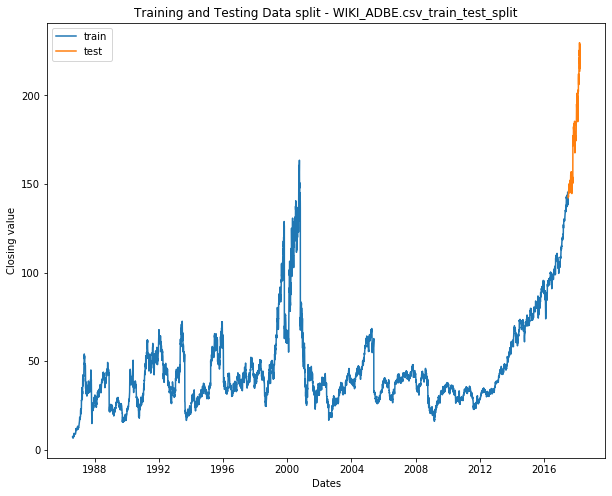

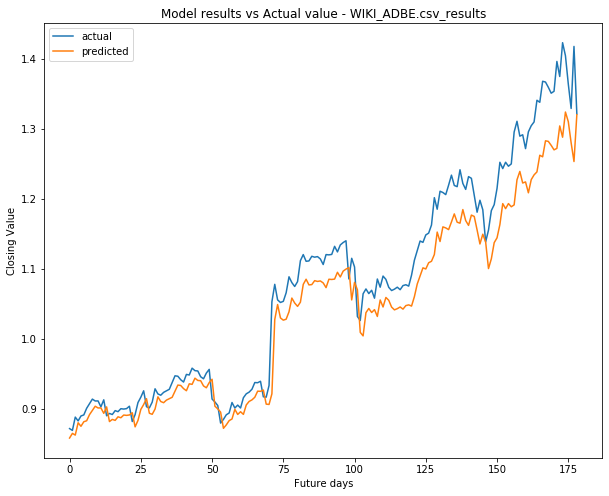

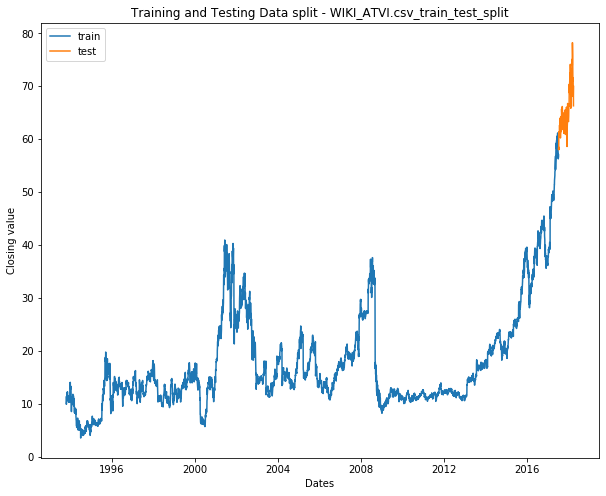

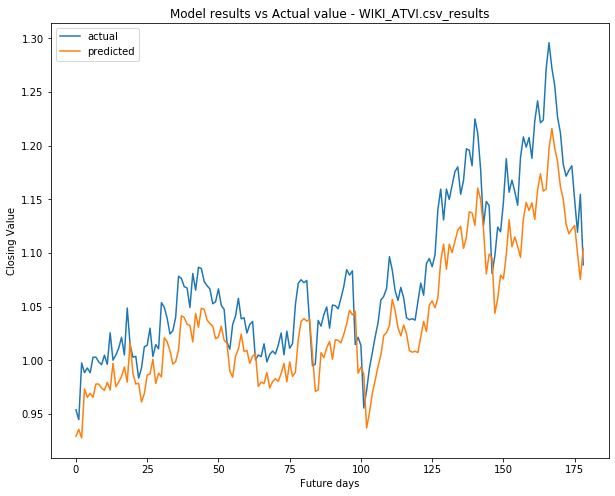

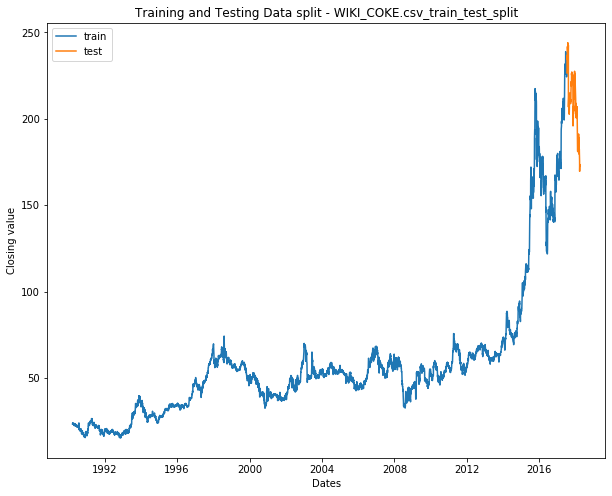

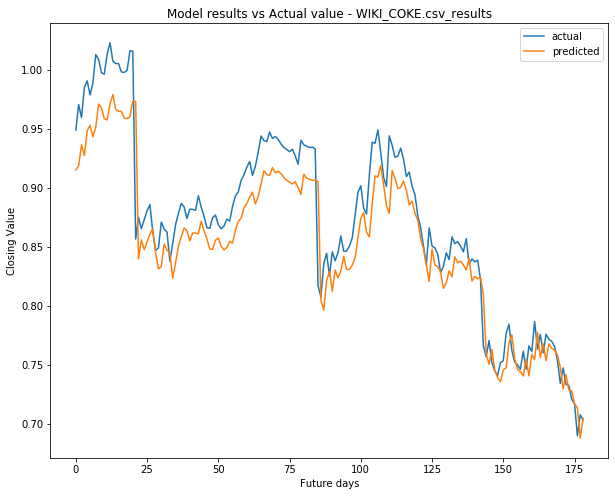

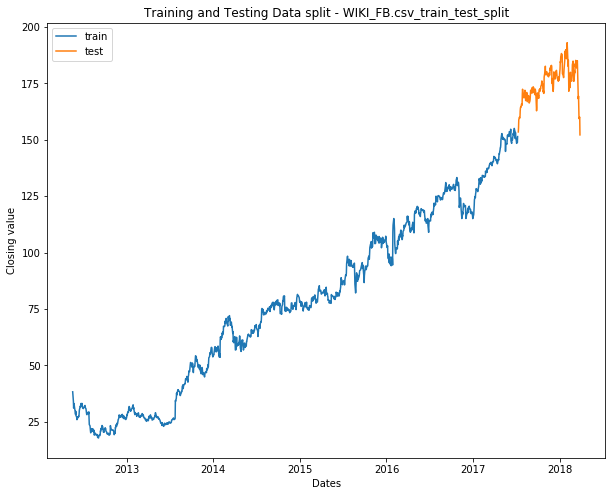

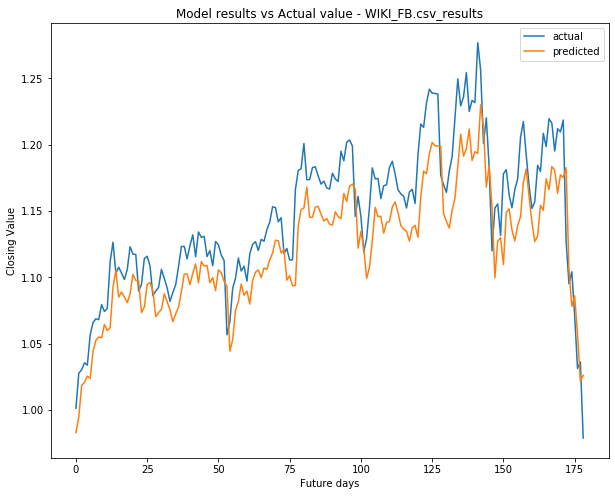

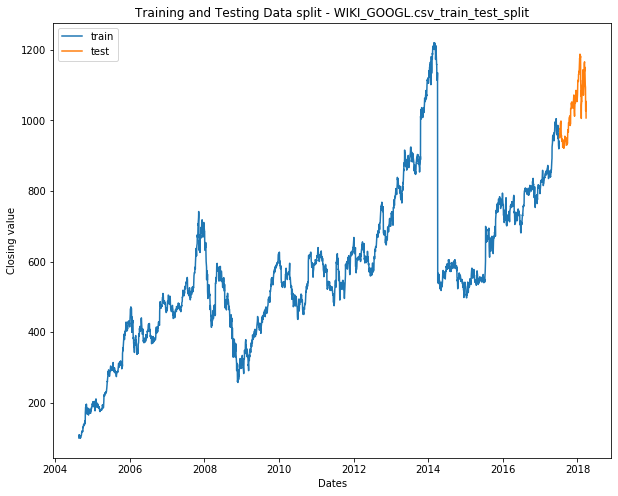

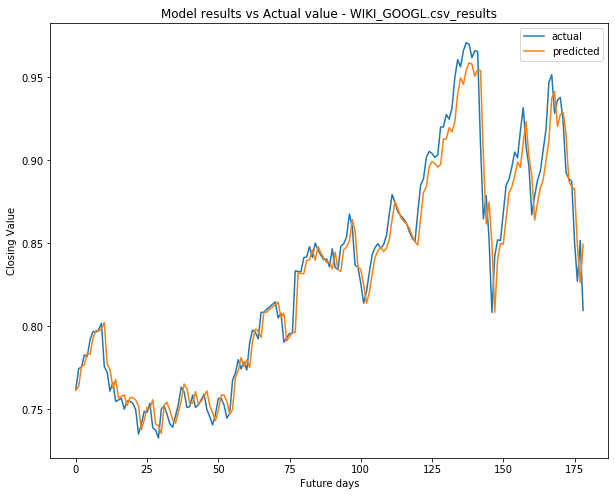

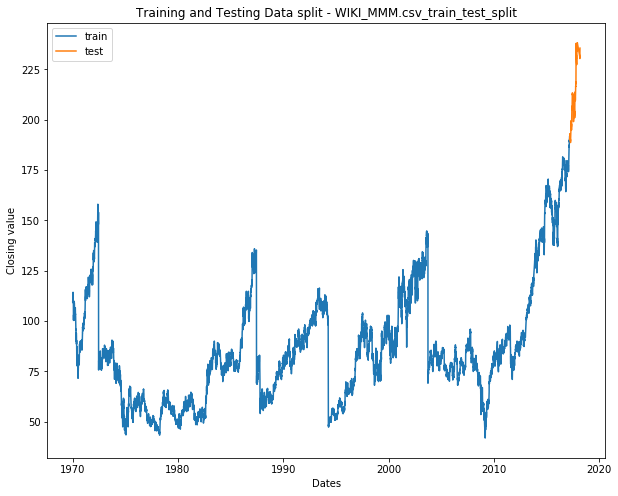

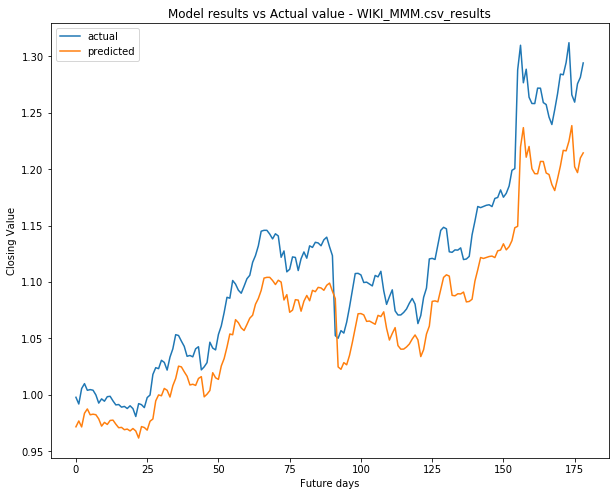

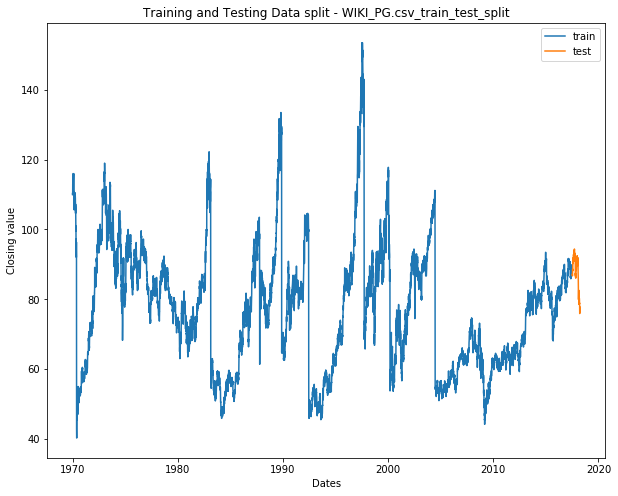

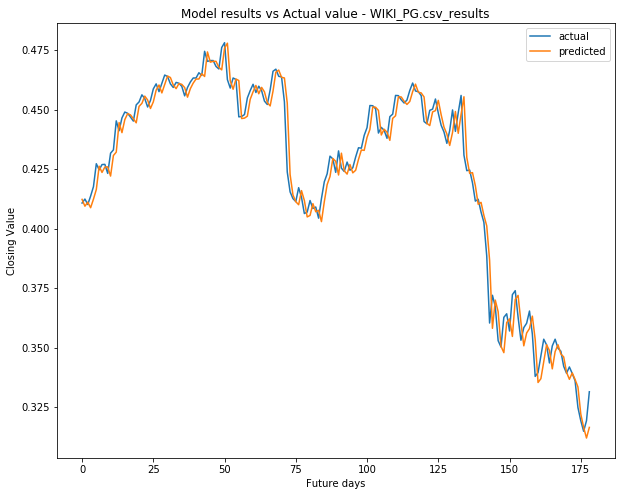

In [8]:
import os

for filename in os.listdir('./data'):
    analyze('./data/{}'.format(filename), 180, filename)